In [3]:
import numpy as np
from tqdm.notebook import tqdm
from simplegrad import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from simplegrad.algo.nn import DenseLayer
from simplegrad.algo.optimize import Adam
from sklearn.metrics import accuracy_score

In [4]:
X, y = make_moons(n_samples=1001, noise=0.15)

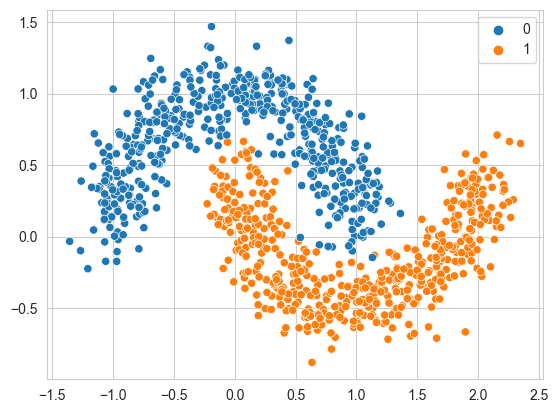

In [5]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=np.ravel(y))
None

In [6]:
denseLayerOne = DenseLayer(num_neurons=64, activation='elu')
denseLayerTwo = DenseLayer(num_neurons=32, activation='elu')
denseLayerThree = DenseLayer(num_neurons=1, activation='sigmoid')

In [7]:
def makeModel(input):
    model = denseLayerOne(input)
    model = denseLayerTwo(model)
    model = denseLayerThree(model)
    return model

In [8]:
X_var = Value(X)
model = makeModel(X_var)
model.shape

(1001, 1)

In [9]:
loss = ((model - y) ** 2).sum()

In [10]:
optimizer = Adam(
    model=loss,
    variables=denseLayerOne.getTrainable() +
              # denseLayerTwo.getTrainable() +
              denseLayerThree.getTrainable(),
    lr=0.001
)

In [11]:
history = []
for _ in tqdm(range(500)):
    optimizer.step()
    history.append(loss.value[0, 0])

  0%|          | 0/500 [00:00<?, ?it/s]

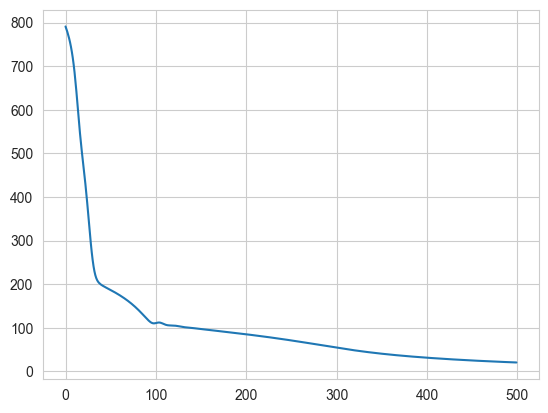

In [12]:
sns.lineplot(x=np.arange(len(history)), y=history)
None

In [13]:
accuracy_score(np.rint(model.forward()), y)


0.98001998001998

In [31]:
from simplegrad import Variable
from simplegrad.algo.optimize import Adam


def f(x):
    return x ** 4 - 20 * x ** 3 - 2 * x ** 2 - 8 * x + 3


x = Variable(5)
optimizer = Adam(model=f(x), variables=[x], lr=0.05)
hist = []
for iter in range(300):
    optimizer.step()
    hist.append((x.scalar, f(x.scalar)))

print(x.scalar)

15.074388237081159


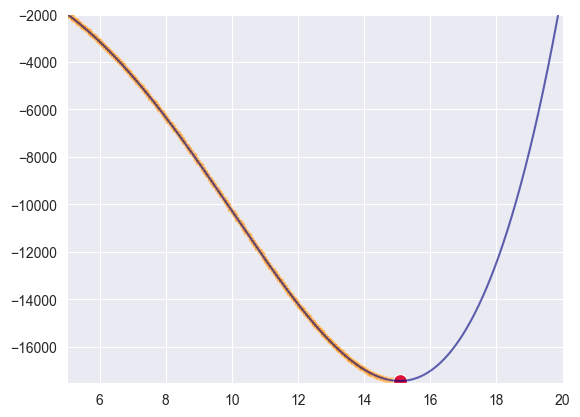

In [32]:
xs = np.linspace(5, 20, 1000)
sns.set_style('darkgrid')
sns.lineplot(x=xs, y=f(xs), c='navy', alpha=0.6)
hist = np.array(hist)
sns.scatterplot(x=hist[:, 0], y=hist[:, 1], s=20, alpha=0.6, color='darkorange')
sns.scatterplot(x=[x.scalar], y=[f(x.scalar)], color='crimson', s=100)
plt.xlim(xs.min(), xs.max())
plt.ylim(f(15) - 100, f(xs.min()))
None